In [1]:
#Step 1: Using the Binomial Distribution
from scipy.stats import binom

def ensemble_accuracy(n_models, model_accuracy, required_majority):
    return sum(binom.pmf(k, n_models, model_accuracy) for k in range(required_majority, n_models + 1))

#Step 1(a): If an ensemble model is composed of 15 individual models that each have 63% accuracy, what is the ensemble model accuracy?
n_models_a = 15
individual_accuracy_a = 0.63
required_majority_a = n_models_a // 2 + 1

ensemble_accuracy_a = ensemble_accuracy(n_models_a, individual_accuracy_a, required_majority_a)
print(f"Step 1(a): Ensemble accuracy with 15 models each at 63% accuracy: {ensemble_accuracy_a:.2%}")

#Steo 1(b): What would the accuracy of the 15 individual models need to be in order for the ensemble model to have 95% accuracy? Find the smallest whole number percentage so this is satisfied.
target_ensemble_accuracy_b = 0.95
required_majority_b = required_majority_a

min_individual_accuracy_b = 0.63
while ensemble_accuracy(n_models_a, min_individual_accuracy_b, required_majority_b) < target_ensemble_accuracy_b:
    min_individual_accuracy_b += 0.01

print(f"Step 1(b): Minimum individual accuracy for ensemble to reach 95% accuracy: {min_individual_accuracy_b:.0%}")

#Step 1(c): If each individual model has 63% accuracy, how many individual models are needed for the ensemble model to have 95% accuracy? Find the smallest odd number of models (so there is a clear majority), so that this is satisfied.
individual_accuracy_c = 0.63
target_ensemble_accuracy_c = 0.95
n_models_c = 15

while ensemble_accuracy(n_models_c, individual_accuracy_c, n_models_c // 2 + 1) < target_ensemble_accuracy_c:
    n_models_c += 2

print(f"Step 1(c): Smallest odd number of models with 63% accuracy to achieve 95% ensemble accuracy: {n_models_c}")

Step 1(a): Ensemble accuracy with 15 models each at 63% accuracy: 85.13%
Step 1(b): Minimum individual accuracy for ensemble to reach 95% accuracy: 71%
Step 1(c): Smallest odd number of models with 63% accuracy to achieve 95% ensemble accuracy: 39


Step 2(d): The histogram of means displays a bell-shaped, normal distribution due to the Central Limit Theorem.


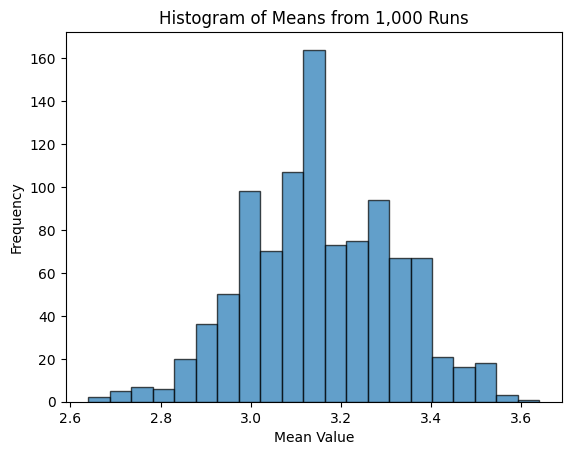


Step 2(e):
• Mean of the List of Means: 3.15562
• Standard Deviation of the List of Means: 0.1640646689570914
• Theoretical Mean: 3.15
• Theoretical Standard Deviation of the Sample Mean: 0.16896745248715803


In [2]:
#Step 2: Working with Random Data
import numpy as np
import matplotlib.pyplot as plt

#Step 2(a): Make up your own probability mass function (pmf) for X. Make sure it satisfies the requirements of a pmf.
def custom_pmf():
    values = np.array([1, 2, 3, 4, 5])
    probabilities = np.array([0.1, 0.2, 0.3, 0.25, 0.15])
    return values, probabilities

#Step 2(b): Build a function that will generate 50 random X-values from the pmf you created in part (a) and return the mean of these values.
def generate_random_samples_and_mean():
    values, probabilities = custom_pmf()
    samples = np.random.choice(values, size=50, p=probabilities)
    return np.mean(samples)

#Step 2(c): Now, build a function that will run your function in part (b), 1, 000 times and store the means in a list.
def generate_means_list():
    means_list = [generate_random_samples_and_mean() for _ in range(1000)]
    return means_list

#Step 2(d): Create a histogram of the means in the list from part (c). Describe the shape of this histogram. What theorem tells us that it will look the way it does?
means_list = generate_means_list()

n = len(means_list)
q25, q75 = np.percentile(means_list, [25, 75])
iqr = q75 - q25
freedman_diaconis_bin_width = 2 * iqr / np.cbrt(n)
freedman_diaconis_bins = int(np.ceil((max(means_list) - min(means_list)) / freedman_diaconis_bin_width))

print("Step 2(d): The histogram of means displays a bell-shaped, normal distribution due to the Central Limit Theorem.")

plt.hist(means_list, bins=freedman_diaconis_bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Means from 1,000 Runs')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

#Step (e):What is the mean and standard deviation of your list of means? What are their theoretical values?
mean_of_means = np.mean(means_list)
std_dev_of_means = np.std(means_list)
print("\nStep 2(e):")
print(f"• Mean of the List of Means: {mean_of_means}")
print(f"• Standard Deviation of the List of Means: {std_dev_of_means}")

values, probabilities = custom_pmf()
theoretical_mean = np.sum(values * probabilities)
theoretical_variance = np.sum((values - theoretical_mean) ** 2 * probabilities) / 50
theoretical_std_dev = np.sqrt(theoretical_variance)

print(f"• Theoretical Mean: {theoretical_mean}")
print(f"• Theoretical Standard Deviation of the Sample Mean: {theoretical_std_dev}")